In [92]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Lasso
%matplotlib inline

In [93]:
dataset = pd.read_csv('C:/Users/avgon/Desktop/GPS Trajectory/go_track_track_full.csv')
dataset.shape
dataset.describe()

,id,id_android,speed,time,distance,rating,rating_bus,rating_weather,car_or_bus,Unnamed: 10,Unnamed: 11,Unnamed: 12,latitude,longitude,track_id
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,0.0,0.0,0.0,18107.000000,18107.000000,18107.000000
mean,15607.650307,7.386503,16.704738,0.264272,5.302411,2.515337,0.386503,0.515337,1.466258,NaN,NaN,NaN,-10.998744,-37.111923,13296.340697
std,18644.257138,7.348742,16.016168,0.292731,7.639011,0.679105,0.687859,0.841485,0.500397,NaN,NaN,NaN,1.329848,0.938015,18040.767448
min,1.000000,0.000000,0.009779,0.002175,0.001000,1.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,-27.603175,-48.632918,1.000000
25%,48.500000,1.000000,1.591016,0.035978,0.034500,2.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,-10.944041,-37.073069,33.000000
50%,158.000000,4.000000,16.685368,0.214466,3.995000,3.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,-10.922000,-37.057784,136.000000
75%,37991.000000,10.000000,23.915760,0.390572,7.333000,3.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN,-10.904268,-37.050190,37992.000000
max,38092.000000,27.000000,96.206029,1.942948,55.770000,3.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,-10.292845,-36.493357,38092.000000


In [94]:
#check if some data is absent
dataset.isnull().any()

print(dataset.info()) # will give you info about the dataset columns

dataset = dataset.dropna()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18107 entries, 0 to 18106
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              163 non-null    float64
 1   id_android      163 non-null    float64
 2   speed           163 non-null    float64
 3   time            163 non-null    float64
 4   distance        163 non-null    float64
 5   rating          163 non-null    float64
 6   rating_bus      163 non-null    float64
 7   rating_weather  163 non-null    float64
 8   car_or_bus      163 non-null    float64
 9   linha           80 non-null     object 
 10  Unnamed: 10     0 non-null      float64
 11  Unnamed: 11     0 non-null      float64
 12  Unnamed: 12     0 non-null      float64
 13  id.1            18107 non-null  object 
 14  latitude        18107 non-null  float64
 15  longitude       18107 non-null  float64
 16  track_id        18107 non-null  int64  
 17  time.1          18107 non-null 

In [95]:
#if some results are True, remove columns
dataset = dataset.fillna(method='ffill')

In [96]:
#divide the data into “attributes” and “labels”. X variable contains all the attributes/features and y variable contains labels
X = dataset[['id', 'id_android', 'speed', 'time', 'rating', 'rating_bus', 'rating_weather','car_or_bus', 'latitude', 'longitude', 'track_id'] ].values
y = dataset['distance'].values

c:\python37\lib\site-packages\seaborn\distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
c:\python37\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\python37\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


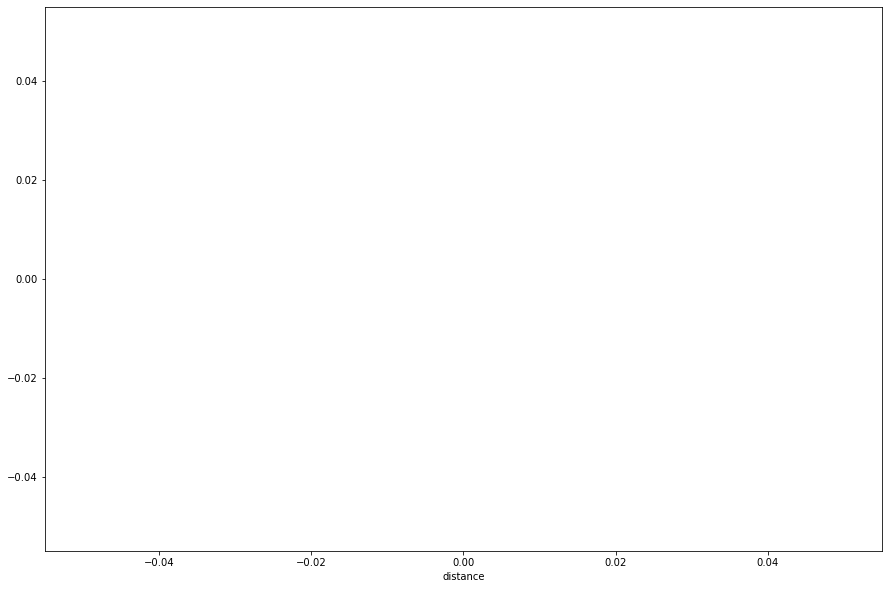

In [97]:
#check average value of "time" column
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['distance'])

In [98]:
#split 80% of the data to the training set while 20% of the data to test set using below code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
#train our model
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

In [99]:
#the regression model has to find the most optimal coefficients for all the attributes
coeff_df = pd.DataFrame(regressor.coef_, ['id', 'id_android', 'speed', 'time', 'rating', 'rating_bus', 'rating_weather', 'car_or_bus', 'latitude', 'longitude', 'track_id' ], columns=['Coefficient'])  
coeff_df

,Coefficient
id,-1.594474e-05
id_android,3.420761e-02
speed,2.149211e-01
time,1.572804e+01
rating,1.573042e+00
rating_bus,6.688236e-01
rating_weather,6.670089e-02
car_or_bus,9.194713e-02
latitude,4.837901e-03
longitude,-6.969139e-03


In [100]:
#prediction to test data
y_pred = regressor.predict(X_test)

#Check the difference between the actual value and predicted value.
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

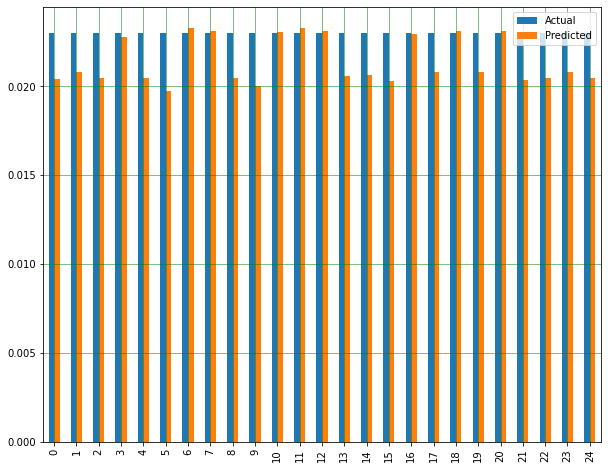

In [101]:
#comparison of Actual and Predicted values
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [74]:
#evaluate prefromance
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.023295235415192597
Mean Squared Error: 0.10904098010055314
Root Mean Squared Error: 0.33021353712492335
